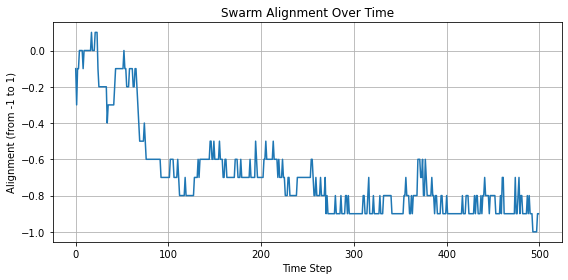

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Simulation parameters
N = 20                  # number of locusts
C = 1.0                 # circumference of the ring
v_mag = 0.001           # speed magnitude
r = 0.045               # perception range
P = 0.015               # spontaneous switch probability
T = 500                 # total time steps

# Initialize locust positions and velocities
positions = np.random.uniform(0, C, N)
velocities = np.random.choice([-v_mag, v_mag], N)

# Track alignment over time
alignment_over_time = []

# For animation
positions_over_time = []

for t in range(T):
    new_velocities = velocities.copy()
    
    for i in range(N):
        xi = positions[i]
        vi = velocities[i]
        
        # Compute distances on the ring
        diffs = np.abs(positions - xi)
        dists = np.minimum(diffs, C - diffs)
        mask = (dists <= r) & (np.arange(N) != i)
        
        neighbor_velocities = velocities[mask]
        if len(neighbor_velocities) > 0:
            # Majority rule
            opposite_count = np.sum(np.sign(neighbor_velocities) != np.sign(vi))
            if opposite_count > len(neighbor_velocities) / 2:
                new_velocities[i] = -vi
            elif np.random.rand() < P:
                new_velocities[i] = -vi
        elif np.random.rand() < P:
            new_velocities[i] = -vi

    # Update velocities and positions
    velocities = new_velocities
    positions = (positions + velocities) % C

    # Save for animation and tracking
    positions_over_time.append(positions.copy())
    alignment = np.sum(velocities) / (N * v_mag)
    alignment_over_time.append(alignment)

# Plot alignment over time
plt.figure(figsize=(8, 4))
plt.plot(alignment_over_time)
plt.title("Swarm Alignment Over Time")
plt.xlabel("Time Step")
plt.ylabel("Alignment (from -1 to 1)")
plt.grid(True)
plt.tight_layout()
plt.show()


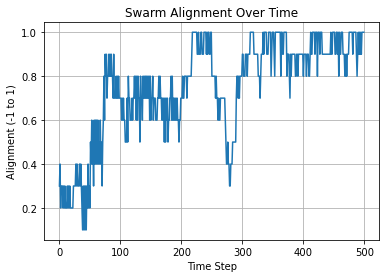

In [49]:
# Dimension Reduction and Modeling 
import numpy as np
import matplotlib.pyplot as plt


no_of_locust = 20
circum = 1
percept_range = 0.045
time_stamp = 500
speed = [0.001 , -0.001]

locust_pos = np.random.uniform(0,circum,no_of_locust)
locust_speed = np.random.choice(speed, no_of_locust)

alignment_history = []
flip_counts = []
left_counts = []

for ts in range(time_stamp):
    left_count = np.sum(locust_speed < 0)
    left_counts.append(left_count)
    
    new_speed = locust_speed.copy()
    
    for n in range(no_of_locust):
        locust_n_pos = locust_pos[n]
        locust_n_speed = locust_speed[n]
        
        diff = np.abs(locust_pos - locust_n_pos)
        distance_from_locust_n = np.minimum(diff, circum - diff)
        # print(f"Locus no {n} and distance from locust is {distance_from_locust_n}")
        # print(f"Time step {ts} | Locust {n} | Distances: {distance_from_locust_n}")

        neighbor_mask = (distance_from_locust_n < percept_range) & (np.arange(no_of_locust) != n)
        neighbor_speeds = locust_speed[neighbor_mask]

        opposite_count = np.sum(np.sign(neighbor_speeds) != np.sign(locust_n_speed))
        # print(f"Current Locust {n} its direction {locust_n_speed} and opposite count is {opposite_count} ")

        if len(neighbor_speeds) > 0 and opposite_count > len(neighbor_speeds) / 2:
            new_speed[n] = -locust_n_speed
        elif np.random.rand() < 0.015:
            new_speed[n] = -locust_n_speed

    flip_count = np.sum(locust_speed != new_speed)
    flip_counts.append(flip_count)
    
    locust_speed = new_speed
    locust_pos = (locust_pos + locust_speed) % circum 

    alignment = np.sum(locust_speed) / (no_of_locust * 0.001)
    alignment_history.append(alignment)


#optional Visualization of Swarm Alignmnet over time (like which sides create more influence)
plt.plot(alignment_history)
plt.title("Swarm Alignment Over Time")
plt.xlabel("Time Step")
plt.ylabel("Alignment (-1 to 1)")
plt.grid(True)
plt.show()

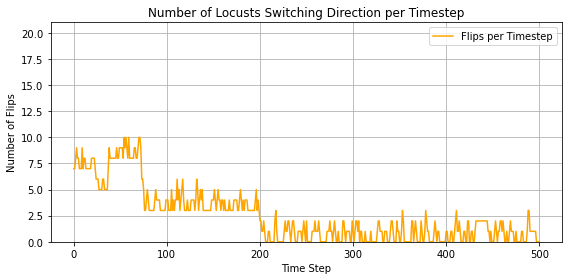

In [50]:
#optional , visualization of number of locust flipping with respect to time step
plt.figure(figsize=(8, 4))
plt.plot(flip_counts, color='orange', label='Flips per Timestep')
plt.title("Number of Locusts Switching Direction per Timestep")
plt.xlabel("Time Step")
plt.ylabel("Number of Flips")
plt.ylim(0, no_of_locust + 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

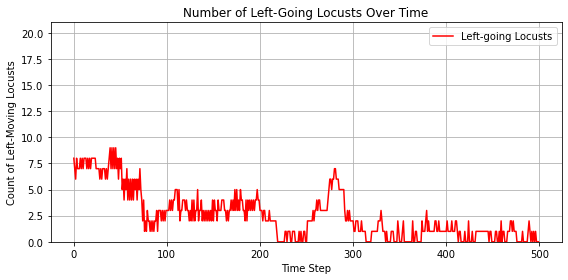

In [51]:
#Task A
plt.figure(figsize=(8, 4))
plt.plot(left_counts, color='red', label='Left-going Locusts')
plt.title("Number of Left-Going Locusts Over Time")
plt.xlabel("Time Step")
plt.ylabel("Count of Left-Moving Locusts")
plt.ylim(0, no_of_locust + 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

TASK B

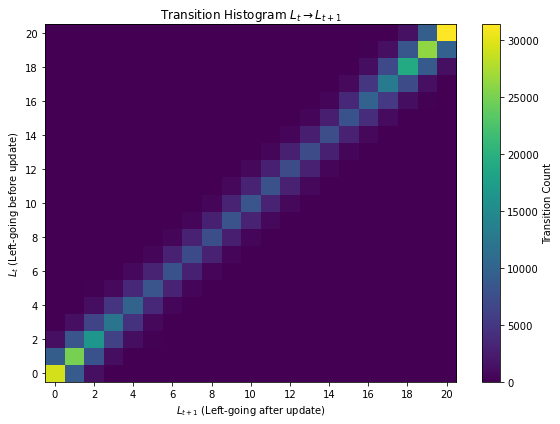

In [52]:
import numpy as np
import matplotlib.pyplot as plt

no_of_locust = 20
circum = 1
percept_range = 0.045
time_stamp = 500
speed = [0.001 , -0.001]
num_of_runs = 1000

transition_matrix = np.zeros((no_of_locust + 1, no_of_locust + 1), dtype=int)

for run in range(num_of_runs):
    locust_pos = np.random.uniform(0, circum, no_of_locust)
    locust_speed = np.random.choice(speed, no_of_locust)

    for ts in range(time_stamp):
        left_count = np.sum(locust_speed < 0)
        
        new_speed = locust_speed.copy()
        
        for n in range(no_of_locust):
            locust_n_pos = locust_pos[n]
            locust_n_speed = locust_speed[n]
            
            diff = np.abs(locust_pos - locust_n_pos)
            distance_from_locust_n = np.minimum(diff, circum - diff)
            # print(f"Locus no {n} and distance from locust is {distance_from_locust_n}")
            # print(f"Time step {ts} | Locust {n} | Distances: {distance_from_locust_n}")
    
            neighbor_mask = (distance_from_locust_n < percept_range) & (np.arange(no_of_locust) != n)
            neighbor_speeds = locust_speed[neighbor_mask]
    
            opposite_count = np.sum(np.sign(neighbor_speeds) != np.sign(locust_n_speed))
            # print(f"Current Locust {n} its direction {locust_n_speed} and opposite count is {opposite_count} ")
    
            if len(neighbor_speeds) > 0 and opposite_count > len(neighbor_speeds) / 2:
                new_speed[n] = -locust_n_speed
            elif np.random.rand() < 0.015:
                new_speed[n] = -locust_n_speed

        left_count_next = np.sum(new_speed < 0)
        transition_matrix[left_count][left_count_next] += 1

        locust_speed = new_speed
        locust_pos = (locust_pos + locust_speed) % circum

plt.figure(figsize=(8, 6))
plt.imshow(transition_matrix, origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Transition Count')
plt.title("Transition Histogram $L_t \\rightarrow L_{t+1}$")
plt.xlabel("$L_{t+1}$ (Left-going after update)")
plt.ylabel("$L_t$ (Left-going before update)")
plt.xticks(np.arange(0, no_of_locust + 1, 2))
plt.yticks(np.arange(0, no_of_locust + 1, 2))
plt.tight_layout()
plt.show()


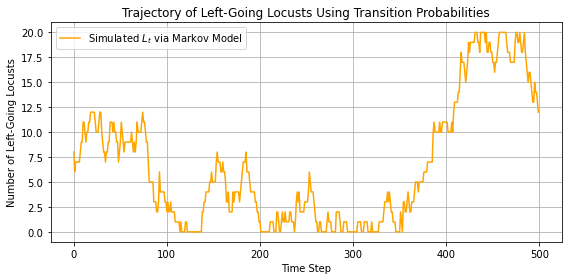

In [53]:
#task c
state_counts = np.sum(transition_matrix, axis=1)


P = np.zeros_like(transition_matrix, dtype=float)
for i in range(no_of_locust + 1):
    if state_counts[i] > 0:
        P[i] = transition_matrix[i] / state_counts[i]

simulated_L = []
initial_L = np.random.randint(0, no_of_locust + 1)
simulated_L.append(initial_L)

for _ in range(time_stamp - 1):
    current_L = simulated_L[-1]
    next_L = np.random.choice(np.arange(no_of_locust + 1), p=P[current_L])
    simulated_L.append(next_L)

plt.figure(figsize=(8, 4))
plt.plot(simulated_L, label="Simulated $L_t$ via Markov Model", color='orange')
plt.title("Trajectory of Left-Going Locusts Using Transition Probabilities")
plt.xlabel("Time Step")
plt.ylabel("Number of Left-Going Locusts")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

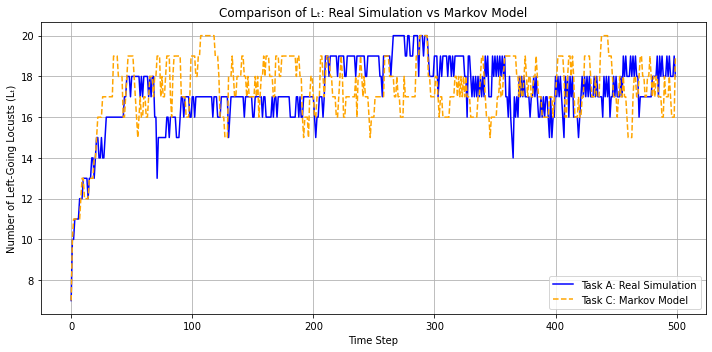

In [54]:
import numpy as np
import matplotlib.pyplot as plt

no_of_locust = 20
circum = 1
percept_range = 0.045
time_stamp = 500
speed = [0.001, -0.001]

# --- Task A ---
transition_matrix = np.zeros((no_of_locust + 1, no_of_locust + 1), dtype=int)
real_Lt = []  # For Task A

locust_pos = np.random.uniform(0, circum, no_of_locust)
locust_speed = np.random.choice(speed, no_of_locust)

for ts in range(time_stamp):
    L_t = np.sum(locust_speed < 0)
    real_Lt.append(L_t)

    new_speed = locust_speed.copy()

    for n in range(no_of_locust):
        locust_n_pos = locust_pos[n]
        locust_n_speed = locust_speed[n]
        
        diff = np.abs(locust_pos - locust_n_pos)
        distance_from_locust_n = np.minimum(diff, circum - diff)
        
        neighbor_mask = (distance_from_locust_n < percept_range) & (np.arange(no_of_locust) != n)
        neighbor_speeds = locust_speed[neighbor_mask]
        
        opposite_count = np.sum(np.sign(neighbor_speeds) != np.sign(locust_n_speed))
        
        if len(neighbor_speeds) > 0 and opposite_count > len(neighbor_speeds) / 2:
            new_speed[n] = -locust_n_speed
        elif np.random.rand() < 0.015:
            new_speed[n] = -locust_n_speed

    L_t_plus_1 = np.sum(new_speed < 0)
    transition_matrix[L_t][L_t_plus_1] += 1

    locust_speed = new_speed
    locust_pos = (locust_pos + locust_speed) % circum

# --- Task C ---
state_counts = np.sum(transition_matrix, axis=1)
P = np.zeros_like(transition_matrix, dtype=float)

for i in range(no_of_locust + 1):
    if state_counts[i] > 0:
        P[i] = transition_matrix[i] / state_counts[i]

markov_Lt = []
initial_L = np.random.randint(0, no_of_locust + 1)
markov_Lt.append(initial_L)

for _ in range(time_stamp - 1):
    current_L = markov_Lt[-1]
    next_L = np.random.choice(np.arange(no_of_locust + 1), p=P[current_L])
    markov_Lt.append(next_L)

# --- Plot comparison ---
plt.figure(figsize=(10, 5))
plt.plot(real_Lt, label="Task A: Real Simulation", color='blue')
plt.plot(markov_Lt, label="Task C: Markov Model", color='orange', linestyle='--')
plt.title("Comparison of Lₜ: Real Simulation vs Markov Model")
plt.xlabel("Time Step")
plt.ylabel("Number of Left-Going Locusts (Lₜ)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
